In [69]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

from funcs import load_stocks_dataframe
df = load_stocks_dataframe()
df = df.dropna()

In [59]:
df.head()

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
712,2003-04-01,8.603225,0.010614,26.337534,0.016642,3.827,0.001046,0.004,1.4729,0.002314,0.0034,1.64,-0.006061,-0.01,2.17513,-0.034786,-0.07839
713,2003-04-02,8.835845,0.027039,27.103275,0.029074,3.932,0.027437,0.105,1.4762,0.002240,0.0033,1.66,0.012195,0.02,2.17513,-0.034786,-0.07839
714,2003-04-03,8.831999,-0.000435,26.878065,-0.008309,3.916,-0.004069,-0.016,1.4760,-0.000135,-0.0002,1.64,-0.012048,-0.02,2.17513,-0.034786,-0.07839
715,2003-04-04,8.824308,-0.000871,27.038921,0.005985,3.944,0.007150,0.028,1.4720,-0.002710,-0.0040,1.63,-0.006098,-0.01,2.17513,-0.034786,-0.07839
716,2003-04-07,8.828156,0.000436,27.109701,0.002618,4.014,0.017748,0.070,1.4843,0.008356,0.0123,1.61,-0.012270,-0.02,2.17513,-0.034786,-0.07839


In [70]:
#idx = pd.date_range(start="2003-04-01", end="2022-01-13")
#df.index = pd.DatetimeIndex(df.index)
df.index = pd.DatetimeIndex(df["Date"])

#df = df.reindex(idx, fill_value=0)
df

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
Date,,,,,,,,,,,,,,,,,
2003-04-01,2003-04-01,8.603225,0.010614,26.337534,0.016642,3.827,0.001046,0.004,1.4729,0.002314,0.0034,1.64,-0.006061,-0.01,2.17513,-0.034786,-0.07839
2003-04-02,2003-04-02,8.835845,0.027039,27.103275,0.029074,3.932,0.027437,0.105,1.4762,0.002240,0.0033,1.66,0.012195,0.02,2.17513,-0.034786,-0.07839
2003-04-03,2003-04-03,8.831999,-0.000435,26.878065,-0.008309,3.916,-0.004069,-0.016,1.4760,-0.000135,-0.0002,1.64,-0.012048,-0.02,2.17513,-0.034786,-0.07839
2003-04-04,2003-04-04,8.824308,-0.000871,27.038921,0.005985,3.944,0.007150,0.028,1.4720,-0.002710,-0.0040,1.63,-0.006098,-0.01,2.17513,-0.034786,-0.07839
2003-04-07,2003-04-07,8.828156,0.000436,27.109701,0.002618,4.014,0.017748,0.070,1.4843,0.008356,0.0123,1.61,-0.012270,-0.02,2.17513,-0.034786,-0.07839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,2022-01-07,79.930000,-0.009664,158.410004,0.002658,1.771,0.021927,0.038,1.2643,-0.006444,-0.0082,2.78,0.003610,0.01,7.09654,0.039273,0.26817
2022-01-10,2022-01-10,79.989998,0.000751,157.820007,-0.003724,1.780,0.005082,0.009,1.2679,0.002847,0.0036,2.77,-0.003597,-0.01,7.09654,0.039273,0.26817
2022-01-11,2022-01-11,80.860001,0.010876,158.929993,0.007033,1.746,-0.019101,-0.034,1.2598,-0.006389,-0.0081,2.87,0.036101,0.10,7.09654,0.039273,0.26817


In [61]:
df.asfreq('B')

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
Date,,,,,,,,,,,,,,,,,
2003-04-01,2003-04-01,8.603225,0.010614,26.337534,0.016642,3.827,0.001046,0.004,1.4729,0.002314,0.0034,1.64,-0.006061,-0.01,2.17513,-0.034786,-0.07839
2003-04-02,2003-04-02,8.835845,0.027039,27.103275,0.029074,3.932,0.027437,0.105,1.4762,0.002240,0.0033,1.66,0.012195,0.02,2.17513,-0.034786,-0.07839
2003-04-03,2003-04-03,8.831999,-0.000435,26.878065,-0.008309,3.916,-0.004069,-0.016,1.4760,-0.000135,-0.0002,1.64,-0.012048,-0.02,2.17513,-0.034786,-0.07839
2003-04-04,2003-04-04,8.824308,-0.000871,27.038921,0.005985,3.944,0.007150,0.028,1.4720,-0.002710,-0.0040,1.63,-0.006098,-0.01,2.17513,-0.034786,-0.07839
2003-04-07,2003-04-07,8.828156,0.000436,27.109701,0.002618,4.014,0.017748,0.070,1.4843,0.008356,0.0123,1.61,-0.012270,-0.02,2.17513,-0.034786,-0.07839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,2022-01-07,79.930000,-0.009664,158.410004,0.002658,1.771,0.021927,0.038,1.2643,-0.006444,-0.0082,2.78,0.003610,0.01,7.09654,0.039273,0.26817
2022-01-10,2022-01-10,79.989998,0.000751,157.820007,-0.003724,1.780,0.005082,0.009,1.2679,0.002847,0.0036,2.77,-0.003597,-0.01,7.09654,0.039273,0.26817
2022-01-11,2022-01-11,80.860001,0.010876,158.929993,0.007033,1.746,-0.019101,-0.034,1.2598,-0.006389,-0.0081,2.87,0.036101,0.10,7.09654,0.039273,0.26817


In [71]:
df = df.asfreq('B')
df.index

DatetimeIndex(['2003-04-01', '2003-04-02', '2003-04-03', '2003-04-04',
               '2003-04-07', '2003-04-08', '2003-04-09', '2003-04-10',
               '2003-04-11', '2003-04-14',
               ...
               '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13'],
              dtype='datetime64[ns]', name='Date', length=4903, freq='B')

In [72]:
df = df.fillna(method="ffill")

In [73]:
df.isna().sum()

Date                          0
GrowthStock_AdjClose          0
GrowthStock_PercentChange     0
ValueStock_AdjClose           0
ValueStock_PercentChange      0
Treasury10yr_AdjClose         0
Treasury10yr_PercentChange    0
Treasury10yr_Diff             0
exchange                      0
exchange_PercentChange        0
exchange_Diff                 0
inflation5yr                  0
inflation5yr_PercentChange    0
inflation5yr_Diff             0
CPI                           0
CPI_PercentChange             0
CPI_Diff                      0
dtype: int64

In [7]:
df.iloc[-1]

Date                          2022-01-13 00:00:00
GrowthStock_AdjClose                    79.220001
GrowthStock_PercentChange               -0.024985
ValueStock_AdjClose                    158.770004
ValueStock_PercentChange                -0.001823
Treasury10yr_AdjClose                       1.711
Treasury10yr_PercentChange              -0.008116
Treasury10yr_Diff                          -0.014
exchange                                   1.2482
exchange_PercentChange                   -0.00152
exchange_Diff                             -0.0019
inflation5yr                                 2.77
inflation5yr_PercentChange               -0.01773
inflation5yr_Diff                           -0.05
CPI                                       7.09654
CPI_PercentChange                        0.039273
CPI_Diff                                  0.26817
Name: 2022-01-13 00:00:00, dtype: object

In [83]:
recency = -500
y_train = df.iloc[:recency]["GrowthStock_AdjClose"]
y_test  = df.iloc[recency:]["GrowthStock_AdjClose"]
y_train.shape, y_test.shape

((4403,), (500,))

In [84]:
m = y_train.mean()
time = y_train.index

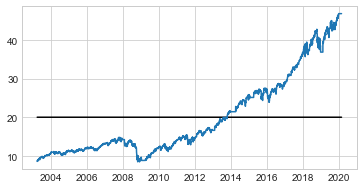

In [85]:
fig, ax = plt.subplots(1, figsize = (6, 3))
ax.plot(time, np.ones(len(time))*m, label = "reference", color = "black")
ax.plot(y_train, label = "Growth Stock Price")

### Time Series Decomposition

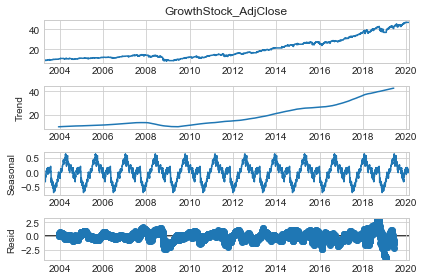

In [87]:
decomposition = sm.tsa.seasonal_decompose(y_train, model='additive', period = 360)
fig = decomposition.plot()

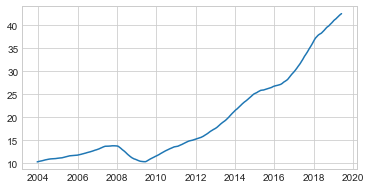

In [88]:
trend = decomposition.trend
time = trend.index
m = decomposition.trend.mean()
fig, ax = plt.subplots(1, figsize = (6,3))
ax.plot(trend, label = 'trend')

### Time Series Forecasting

In [ ]:
order = (1, 3, 3)
seasonal_order = (0, 1, 1, 5)
model = sm.tsa.SARIMAX(y_train, order = order, seasonal_order = seasonal_order)
fit = model.fit()
print(fit.summary())

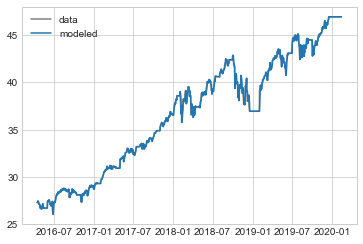

In [90]:
# prediction on training data
train_preds = fit.get_prediction().predicted_mean

recency = -1000

plt.plot(y_train[recency:], color = "grey", label = "data")
plt.plot(train_preds[recency:], zorder = 10, label = "modeled")
plt.legend()

In [38]:
print(y_test.index.values[0], y_test.index.values[-1])

2018-02-20T00:00:00.000000000 2022-02-07T00:00:00.000000000


In [39]:
type(y_test.index.values[0])

numpy.datetime64

In [40]:
from datetime import datetime
start_day = np.datetime_as_string(y_test.index.values[0], unit='D')
start_day

'2018-02-20'

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


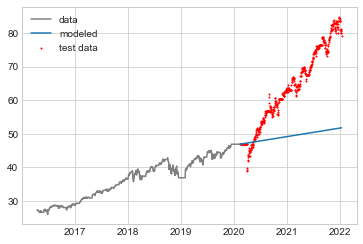

In [91]:
# prediction on test data
test_preds = fit.get_prediction(start = y_test.index.values[0],
                                  end = y_test.index.values[-1])

test_preds = test_preds.predicted_mean

recency = -1000

plt.plot(y_train[recency:], color = "grey", label = "data")
plt.scatter(y_test.index.values, y_test, color = "red", label = "test data", s = 1)
plt.plot(test_preds, zorder = 10, label = "modeled")
plt.legend()

### Model Selection

In [93]:
# loss function
fit.aic

-2053.7655003985

In [94]:
def test_MSE(fit, y_test):
    
    test_preds = fit.get_prediction(start = y_test.index.values[0], 
                                    end  = y_test.index.values[-1])
    test_preds = test_preds.predicted_mean
    
    return ((y_test - test_preds)**2).mean()

In [95]:
test_MSE(fit, y_test)

313.2088187951624

In [ ]:
from itertools import product
a = range(0, 5)

best_order = (0, 0, 0)
best_MSE   = np.inf
for order in product(a, a, a):
    model = sm.tsa.SARIMAX(y_train, order = order, seasonal_order = seasonal_order)
    fit = model.fit(verbose = False)
    MSE = test_MSE(fit, y_test)
    if MSE < best_MSE:
        print("Found MSE " + str(round(MSE, 2)) + " with order " + str(order))
        best_MSE = MSE
        best_order = order
        best_model = model  

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.15369D-01    |proj g|=  2.14921D-02

At iterate    5    f=  5.15147D-01    |proj g|=  8.44104D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      6      8      1     0     0   4.200D-06   5.151D-01
  F =  0.51514694246604187     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


Found MSE 419.93 with order (0, 0, 0)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64599D-01    |proj g|=  4.06339D-01


 This problem is unconstrained.



At iterate    5    f=  2.32284D-01    |proj g|=  1.10091D-01

At iterate   10    f=  2.01889D-01    |proj g|=  1.29669D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     54      2     0     0   2.730D-05   2.019D-01
  F =  0.20188383439571647     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15667D-01    |proj g|=  5.19861D-01

At iterate    5    f=  5.54426D-02    |proj g|=  5.14775D-01

At iterate   10    f=  5.05644D-02    |proj g|=  2.62537D-02

At iterate   15    f=  5.04911D-02    |proj g|=  2.12251D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   3.711D-05   5.049D-02
  F =   5.0489802305477886E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  5.84509D-02    |proj g|=  2.15878D-01

At iterate   10    f=  3.00216D-02    |proj g|=  6.87361D-02

At iterate   15    f=  1.77428D-02    |proj g|=  2.43804D-02

At iterate   20    f=  1.74183D-02    |proj g|=  1.12395D-02

At iterate   25    f=  1.74038D-02    |proj g|=  2.09445D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     30      1     0     0   2.094D-06   1.740D-02
  F =   1.7403786767569932E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.43756D-01    |proj g|=  5.39206D-01

At iterate    5    f= -1.70417D-01    |proj g|=  4.97381D-01

At iterate   10    f= -1.88737D-01    |proj g|=  5.82392D-01

At iterate   15    f= -2.25988D-01    |proj g|=  3.78644D-01

At iterate   20    f= -2.31309D-01    |proj g|=  1.48258D-01

At iterate   25    f= -2.32617D-01    |proj g|=  9.69433D-02

At iterate   30    f= -2.33200D-01    |proj g|=  8.75523D-02

At iterate   35    f= -2.33467D-01    |proj g|=  9.45510D-02

At iterate   40    f= -2.33653D-01    |proj g|=  4.23687D-02

At iterate   45    f= -2.33851D-01    |proj g|=  2.19653D-02

At iterate   50    f= -2.33891D-01    |proj g|=  1.01722D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.74351D-01    |proj g|=  4.95371D-01


 This problem is unconstrained.



At iterate    5    f= -1.80461D-01    |proj g|=  4.20993D-01

At iterate   10    f= -2.23892D-01    |proj g|=  6.12993D-03

At iterate   15    f= -2.32466D-01    |proj g|=  9.26040D-03

At iterate   20    f= -2.33643D-01    |proj g|=  5.82506D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     31      1     0     0   4.332D-05  -2.337D-01
  F = -0.23367766300232798     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found MSE 313.21 with order (0, 1, 0)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variab

 This problem is unconstrained.



At iterate    5    f= -1.81455D-01    |proj g|=  2.78245D-01

At iterate   10    f= -2.22720D-01    |proj g|=  2.82141D-01

At iterate   15    f= -2.33203D-01    |proj g|=  2.24822D-01

At iterate   20    f= -2.34484D-01    |proj g|=  6.32477D-04

At iterate   25    f= -2.34522D-01    |proj g|=  2.63280D-04

At iterate   30    f= -2.34525D-01    |proj g|=  1.07936D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     45      1     0     0   2.820D-04  -2.345D-01
  F = -0.23452470210097220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.94778D-02    |proj g|=  1.67764D+00

At iterate    5    f= -1.82553D-01    |proj g|=  2.57453D-01

At iterate   10    f= -2.08024D-01    |proj g|=  5.38653D-01

At iterate   15    f= -2.32622D-01    |proj g|=  1.30924D-01

At iterate   20    f= -2.35766D-01    |proj g|=  4.33325D-02

At iterate   25    f= -2.35979D-01    |proj g|=  1.84779D-02

At iterate   30    f= -2.35992D-01    |proj g|=  3.45111D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f= -1.82908D-01    |proj g|=  2.53150D-01

At iterate   10    f= -2.24776D-01    |proj g|=  2.11033D-01

At iterate   15    f= -2.35504D-01    |proj g|=  1.30631D-02

At iterate   20    f= -2.36513D-01    |proj g|=  1.57097D-02

At iterate   25    f= -2.36566D-01    |proj g|=  4.84088D-04

At iterate   30    f= -2.36567D-01    |proj g|=  1.42045D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     42      1     0     0   1.420D-03  -2.366D-01
  F = -0.23656732938713942     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00427D-01    |proj g|=  1.68054D+00

At iterate    5    f= -1.82459D-01    |proj g|=  2.21746D-01

At iterate   10    f= -2.10757D-01    |proj g|=  2.78321D-01

At iterate   15    f= -2.31445D-01    |proj g|=  7.42902D-02

At iterate   20    f= -2.36126D-01    |proj g|=  4.18773D-02

At iterate   25    f= -2.36593D-01    |proj g|=  4.86980D-03

At iterate   30    f= -2.36625D-01    |proj g|=  9.02240D-04

At iterate   35    f= -2.36626D-01    |proj g|=  3.72211D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17205D-01    |proj g|=  8.19550D-01

At iterate    5    f=  1.80101D-01    |proj g|=  4.02427D-01

At iterate   10    f=  1.37321D-01    |proj g|=  2.97582D-03

At iterate   15    f=  1.31810D-01    |proj g|=  5.19708D-03

At iterate   20    f=  1.31388D-01    |proj g|=  3.33651D-04

At iterate   25    f=  1.31349D-01    |proj g|=  6.48629D-05

At iterate   30    f=  1.31346D-01    |proj g|=  7.94211D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.13430D-03    |proj g|=  1.62121D+00

At iterate    5    f= -1.36716D-01    |proj g|=  9.85108D-01

At iterate   10    f= -2.20979D-01    |proj g|=  4.58958D-02

At iterate   15    f= -2.31043D-01    |proj g|=  1.78634D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   20    f= -2.31765D-01    |proj g|=  7.32547D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     44      1     0     0   7.325D-03  -2.318D-01
  F = -0.23176528248120015     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found MSE 212.94 with order (0, 2, 1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.72776D-02    |proj g|=  1.62308D+00


 This problem is unconstrained.



At iterate    5    f= -7.28891D-02    |proj g|=  8.19144D-01

At iterate   10    f= -1.90608D-01    |proj g|=  1.11721D-01

At iterate   15    f= -2.25587D-01    |proj g|=  5.80712D-02

At iterate   20    f= -2.31966D-01    |proj g|=  1.57925D-02

At iterate   25    f= -2.32472D-01    |proj g|=  6.15831D-02

At iterate   30    f= -2.32526D-01    |proj g|=  1.85822D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     60      1     0     0   1.064D-02  -2.325D-01
  F = -0.23252889428807894     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found MSE 211.23 with order (0, 2, 2)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.86963D-02    |proj g|=  1.72399D+00


 This problem is unconstrained.



At iterate    5    f= -1.17849D-01    |proj g|=  4.91983D-01

At iterate   10    f= -2.10331D-01    |proj g|=  2.87103D-02

At iterate   15    f= -2.30749D-01    |proj g|=  1.63693D-01

At iterate   20    f= -2.34087D-01    |proj g|=  7.34929D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     44      1     0     0   1.275D-03  -2.341D-01
  F = -0.23410905251782199     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found MSE 208.32 with order (0, 2, 3)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24267D-02    |proj g|=  1.74016D+00


 This problem is unconstrained.



At iterate    5    f= -1.34539D-01    |proj g|=  8.48540D-01

At iterate   10    f= -2.13670D-01    |proj g|=  4.10644D-02

At iterate   15    f= -2.32056D-01    |proj g|=  1.07066D-01

At iterate   20    f= -2.34383D-01    |proj g|=  4.77420D-02

At iterate   25    f= -2.34672D-01    |proj g|=  4.48862D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     46      1     0     0   4.505D-03  -2.347D-01
  F = -0.23467235859921404     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95998D-01    |proj g|=  5.80342D-01


 This problem is unconstrained.



At iterate    5    f=  7.25106D-01    |proj g|=  2.82620D-01

At iterate   10    f=  6.81803D-01    |proj g|=  2.03683D-02

At iterate   15    f=  6.77470D-01    |proj g|=  2.50673D-03

At iterate   20    f=  6.76863D-01    |proj g|=  2.57736D-04

At iterate   25    f=  6.76835D-01    |proj g|=  3.64037D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     28     36      1     0     0   1.153D-03   6.768D-01
  F =  0.67682512383224047     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.47119D-01    |proj g|=  3.38656D+00

At iterate    5    f=  3.09859D-01    |proj g|=  1.41664D-01

At iterate   10    f=  1.64433D-01    |proj g|=  8.69118D-02

At iterate   15    f=  1.38509D-01    |proj g|=  1.17007D-03

At iterate   20    f=  1.34082D-01    |proj g|=  5.47478D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     46      1     0     0   1.345D-03   1.338D-01
  F =  0.13379084028284419     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48867D-01    |proj g|=  1.42627D+00

At iterate    5    f=  6.15965D-02    |proj g|=  8.83180D-01

At iterate   10    f= -7.34853D-02    |proj g|=  2.14013D+00

At iterate   15    f= -1.16840D-01    |proj g|=  4.87118D-02

At iterate   20    f= -1.26864D-01    |proj g|=  8.20439D-01

At iterate   25    f= -1.78293D-01    |proj g|=  1.65807D-01

At iterate   30    f= -2.17547D-01    |proj g|=  1.31532D-01

At iterate   35    f= -2.17784D-01    |proj g|=  4.35929D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36    109      2     0     0   4.359D-03  -2.178D-01
  F = -0.21778381285103968     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Found MSE 111.73 with order (0, 3, 2)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27572D-01    |proj g|=  1.50026D+00


 This problem is unconstrained.



At iterate    5    f=  6.98774D-03    |proj g|=  8.17133D-01

At iterate   10    f= -7.70032D-02    |proj g|=  7.79995D-02

At iterate   15    f= -1.74250D-01    |proj g|=  2.54474D-01

At iterate   20    f= -2.23942D-01    |proj g|=  3.62451D-01

At iterate   25    f= -2.25144D-01    |proj g|=  8.48537D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.25231D-01    |proj g|=  9.44536D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31    133      3     0     0   9.445D-02  -2.252D-01
  F = -0.22523113262247940     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49786D-01    |proj g|=  6.98950D-01

At iterate    5    f=  2.99525D-03    |proj g|=  4.44810D-01

At iterate   10    f= -1.30249D-01    |proj g|=  1.74706D-01

At iterate   15    f= -1.84107D-01    |proj g|=  5.81959D-02

At iterate   20    f= -1.86979D-01    |proj g|=  6.74893D-02

At iterate   25    f= -1.98106D-01    |proj g|=  6.23474D-01

At iterate   30    f= -2.05394D-01    |proj g|=  1.26509D-01

At iterate   35    f= -2.17842D-01    |proj g|=  1.69749D-01

At iterate   40    f= -2.19035D-01    |proj g|=  1.37587D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f= -2.19039D-01    |proj g|=  4.49208D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47    152      3     0     0   3.699D-03  -2.190D-01
  F = -0.21903959656245639     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41340D+00    |proj g|=  3.18051D-01

At iterate    5    f=  1.29292D+00    |proj g|=  4.34563D-02

At iterate   10    f=  1.27349D+00    |proj g|=  1.27603D-03

At iterate   15    f=  1.27163D+00    |proj g|=  2.46689D-03

At iterate   20    f=  1.27145D+00    |proj g|=  1.99599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     28      1     0     0   6.359D-06   1.271D+00
  F =   1.2714414735438599     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86565D+00    |proj g|=  4.03626D+00

At iterate    5    f=  7.79832D-01    |proj g|=  1.03996D-01

At iterate   10    f=  6.90167D-01    |proj g|=  1.19925D-02

At iterate   15    f=  6.80489D-01    |proj g|=  1.44060D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     47      1     0     0   4.801D-02   6.791D-01
  F =  0.67912751104585212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40579D+00    |proj g|=  1.06602D+00


 This problem is unconstrained.



At iterate    5    f=  4.19659D-01    |proj g|=  7.88056D-01

At iterate   10    f=  1.72711D-01    |proj g|=  3.26302D-02

At iterate   15    f=  1.37765D-01    |proj g|=  2.06878D-02

At iterate   20    f=  1.37185D-01    |proj g|=  1.88151D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     41      1     0     0   1.851D-02   1.372D-01
  F =  0.13718465415426254     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  2.69079D-01    |proj g|=  1.16913D+00

At iterate   10    f= -3.78490D-02    |proj g|=  4.78533D-01

At iterate   15    f= -1.99099D-01    |proj g|=  7.17345D+00



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -1.99375D-01    |proj g|=  2.02332D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-5.794E-01  -gs= 8.002E-04 BFGS update SKIPPED


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22    151      4     1     0   1.080D+04  -3.071D-01
  F = -0.30710839253591321     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38011D+00    |proj g|=  9.30324D-01

At iterate    5    f=  2.51452D-01    |proj g|=  1.26379D+00

At iterate   10    f= -1.05000D-02    |proj g|=  7.98418D-01

At iterate   15    f= -1.52004D-01    |proj g|=  8.60971D-01
  ys=-3.255E+00  -gs= 3.446E-02 BFGS update SKIPPED

At iterate   20    f= -1.53587D-01    |proj g|=  3.38884D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -1.53610D-01    |proj g|=  3.75248D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.428E-09  -gs= 1.142E-08 BFGS update SKIPPED


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29    209      5     2     0   7.316D-01  -1.536D-01
  F = -0.15361561854700248     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06016D-02    |proj g|=  3.98973D-01


 This problem is unconstrained.



At iterate    5    f= -1.06323D-01    |proj g|=  1.64470D-01

At iterate   10    f= -1.90956D-01    |proj g|=  1.90853D-01

At iterate   15    f= -2.26687D-01    |proj g|=  6.14210D-02

At iterate   20    f= -2.31824D-01    |proj g|=  4.52181D-03

At iterate   25    f= -2.33325D-01    |proj g|=  1.71287D-03

At iterate   30    f= -2.33505D-01    |proj g|=  1.31455D-03

At iterate   35    f= -2.34071D-01    |proj g|=  2.07083D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     47      1     0     0   6.130D-06  -2.341D-01
  F = -0.23407116125275187     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f= -1.19258D-01    |proj g|=  2.79483D-01

At iterate   10    f= -1.98372D-01    |proj g|=  2.91420D-02

At iterate   15    f= -2.23050D-01    |proj g|=  5.61722D-02

At iterate   20    f= -2.32396D-01    |proj g|=  1.61532D-02

At iterate   25    f= -2.33856D-01    |proj g|=  1.10099D-02

At iterate   30    f= -2.34115D-01    |proj g|=  2.11911D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     54      1     0     0   7.813D-04  -2.341D-01
  F = -0.23411593368910424     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f= -1.17257D-01    |proj g|=  4.91054D-01

At iterate   10    f= -1.53378D-01    |proj g|=  3.87405D-01

At iterate   15    f= -2.12555D-01    |proj g|=  2.30563D-01

At iterate   20    f= -2.29885D-01    |proj g|=  5.22322D-02

At iterate   25    f= -2.34730D-01    |proj g|=  5.25366D-03

At iterate   30    f= -2.35362D-01    |proj g|=  2.47586D-03

At iterate   35    f= -2.35490D-01    |proj g|=  1.51840D-03

At iterate   40    f= -2.35498D-01    |proj g|=  1.22867D-03

At iterate   45    f= -2.35500D-01    |proj g|=  3.30641D-03

At iterate   50    f= -2.35501D-01    |proj g|=  1.32286D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20198D-02    |proj g|=  4.03454D-01


 This problem is unconstrained.



At iterate    5    f= -8.63867D-02    |proj g|=  4.84496D-01

At iterate   10    f= -1.85929D-01    |proj g|=  1.23829D-01

At iterate   15    f= -2.15382D-01    |proj g|=  3.88329D-01

At iterate   20    f= -2.28750D-01    |proj g|=  3.98425D-02

At iterate   25    f= -2.34751D-01    |proj g|=  1.55858D-02

At iterate   30    f= -2.35868D-01    |proj g|=  2.31420D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     51      1     0     0   4.841D-03  -2.361D-01
  F = -0.23608815756302456     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.51085D-01    |proj g|=  5.98995D-01

At iterate    5    f= -1.73057D-01    |proj g|=  4.87504D-01

At iterate   10    f= -1.82260D-01    |proj g|=  1.34355D-01

At iterate   15    f= -2.04353D-01    |proj g|=  1.46870D-01

At iterate   20    f= -2.27515D-01    |proj g|=  7.50912D-02

At iterate   25    f= -2.33627D-01    |proj g|=  1.20417D-01

At iterate   30    f= -2.34647D-01    |proj g|=  5.52661D-02

At iterate   35    f= -2.34885D-01    |proj g|=  4.08927D-02

At iterate   40    f= -2.34960D-01    |proj g|=  3.68950D-02

At iterate   45    f= -2.35002D-01    |proj g|=  3.53498D-02

At iterate   50    f= -2.35018D-01    |proj g|=  2.99562D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.92861D-02    |proj g|=  1.67258D+00

At iterate    5    f= -1.81724D-01    |proj g|=  2.95390D-01

At iterate   10    f= -2.22254D-01    |proj g|=  3.36791D-01

At iterate   15    f= -2.32333D-01    |proj g|=  9.54280D-02

At iterate   20    f= -2.34302D-01    |proj g|=  1.96745D-02

At iterate   25    f= -2.34421D-01    |proj g|=  5.51385D-03

At iterate   30    f= -2.34429D-01    |proj g|=  1.90365D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.91180D-02    |proj g|=  1.66551D+00


 This problem is unconstrained.



At iterate    5    f= -2.03226D-01    |proj g|=  1.96919D-01

At iterate   10    f= -2.31261D-01    |proj g|=  1.26430D-02

At iterate   15    f= -2.33628D-01    |proj g|=  2.36491D-03

At iterate   20    f= -2.33867D-01    |proj g|=  3.45306D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     32      1     0     0   9.349D-05  -2.339D-01
  F = -0.23391543235364706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02461D-01    |proj g|=  1.65183D+00

At iterate    5    f= -1.91875D-01    |proj g|=  1.54254D-01

At iterate   10    f= -2.31203D-01    |proj g|=  3.31705D-02

At iterate   15    f= -2.36112D-01    |proj g|=  3.57671D-02

At iterate   20    f= -2.36405D-01    |proj g|=  2.91915D-03

At iterate   25    f= -2.36417D-01    |proj g|=  2.99939D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     33      1     0     0   

 This problem is unconstrained.



At iterate    5    f= -1.82949D-01    |proj g|=  2.53151D-01

At iterate   10    f= -2.23429D-01    |proj g|=  6.30765D-02

At iterate   15    f= -2.34635D-01    |proj g|=  2.11751D-01

At iterate   20    f= -2.36470D-01    |proj g|=  5.20651D-03

At iterate   25    f= -2.36579D-01    |proj g|=  1.63331D-04

At iterate   30    f= -2.36580D-01    |proj g|=  1.09909D-04

At iterate   35    f= -2.36581D-01    |proj g|=  5.98170D-04

At iterate   40    f= -2.36582D-01    |proj g|=  2.65060D-04

At iterate   45    f= -2.36583D-01    |proj g|=  1.12710D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     79      2     0     0   3.430D-04  -2.366D-01
  F = -0.23658328316358757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00427D-01    |proj g|=  1.68041D+00


 This problem is unconstrained.



At iterate    5    f= -1.82454D-01    |proj g|=  2.20757D-01

At iterate   10    f= -2.14905D-01    |proj g|=  1.01699D-01

At iterate   15    f= -2.31819D-01    |proj g|=  2.93748D-02

At iterate   20    f= -2.36102D-01    |proj g|=  8.88739D-03

At iterate   25    f= -2.36843D-01    |proj g|=  1.69592D-02

At iterate   30    f= -2.37461D-01    |proj g|=  3.50959D-02

At iterate   35    f= -2.37606D-01    |proj g|=  9.65587D-04

At iterate   40    f= -2.37606D-01    |proj g|=  8.26531D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     49      1     0     0   8.265D-05  -2.376D-01
  F = -0.237606340346

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32867D-01    |proj g|=  1.32549D+00

At iterate    5    f=  3.58245D-02    |proj g|=  4.84065D-01

At iterate   10    f= -2.38624D-03    |proj g|=  1.55388D-02

At iterate   15    f= -6.22789D-03    |proj g|=  2.98336D-02

At iterate   20    f= -6.54667D-03    |proj g|=  1.35552D-03

At iterate   25    f= -6.57145D-03    |proj g|=  9.54579D-04

At iterate   30    f= -6.57440D-03    |proj g|=  1.20943D-04
  ys=-3.278E-07  -gs= 2.225E-07 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     59      1     1     0   8.909D-04  -6.575D-03
  F =  -6.5746478049441264E-003

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.40526D-02    |proj g|=  1.65444D+00

At iterate    5    f= -1.37319D-01    |proj g|=  9.80780D-02

At iterate   10    f= -2.04948D-01    |proj g|=  1.11904D-01

At iterate   15    f= -2.27787D-01    |proj g|=  1.90169D-01

At iterate   20    f= -2.32263D-01    |proj g|=  7.91961D-04

At iterate   25    f= -2.32341D-01    |proj g|=  3.49348D-04

At iterate   30    f= -2.32341D-01    |proj g|=  8.23995D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f= -1.33046D-01    |proj g|=  1.03322D+00

At iterate   10    f= -2.19659D-01    |proj g|=  3.10159D-01

At iterate   15    f= -2.29950D-01    |proj g|=  2.07005D-02

At iterate   20    f= -2.31724D-01    |proj g|=  2.77127D-02

At iterate   25    f= -2.31881D-01    |proj g|=  8.59626D-03

At iterate   30    f= -2.31896D-01    |proj g|=  5.49711D-04

At iterate   35    f= -2.31916D-01    |proj g|=  1.20549D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     63      1     0     0   9.978D-04  -2.319D-01
  F = -0.23191870972045317     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -1.23133D-01    |proj g|=  7.32962D-01

At iterate   10    f= -2.12833D-01    |proj g|=  6.38894D-02

At iterate   15    f= -2.28228D-01    |proj g|=  1.19227D-01

At iterate   20    f= -2.31505D-01    |proj g|=  5.16711D-03

At iterate   25    f= -2.32590D-01    |proj g|=  1.29468D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     45      1     0     0   8.549D-03  -2.327D-01
  F = -0.23267388270021111     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.49335D-02    |proj g|=  1.67545D+00


 This problem is unconstrained.



At iterate    5    f= -1.16443D-01    |proj g|=  7.25694D-01

At iterate   10    f= -1.83496D-01    |proj g|=  3.13165D-01

At iterate   15    f= -2.24963D-01    |proj g|=  3.49762D-02

At iterate   20    f= -2.31966D-01    |proj g|=  3.99793D-02

At iterate   25    f= -2.33623D-01    |proj g|=  7.80947D-04

At iterate   30    f= -2.34202D-01    |proj g|=  8.12188D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     50      1     0     0   3.326D-03  -2.342D-01
  F = -0.23420244940086338     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56670D-01    |proj g|=  8.57745D-01

At iterate    5    f=  4.61222D-01    |proj g|=  3.52417D-01

At iterate   10    f=  4.15540D-01    |proj g|=  1.05996D-02

At iterate   15    f=  4.07739D-01    |proj g|=  1.16845D-02

At iterate   20    f=  4.06966D-01    |proj g|=  2.62870D-03

At iterate   25    f=  4.06832D-01    |proj g|=  2.52787D-04

At iterate   30    f=  4.06825D-01    |proj g|=  4.35036D-03

At iterate   35    f=  4.06823D-01    |proj g|=  4.81704D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  2.38959D-01    |proj g|=  3.91449D-01

At iterate   10    f=  3.53634D-02    |proj g|=  4.50899D-01

At iterate   15    f=  6.99162D-04    |proj g|=  1.83723D-02

At iterate   20    f= -3.75703D-03    |proj g|=  2.47559D-02

At iterate   25    f= -4.02057D-03    |proj g|=  1.11190D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     53      1     0     0   1.271D-03  -4.023D-03
  F =  -4.0234119348325275E-003

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  6.15743D-02    |proj g|=  9.15215D-01

At iterate   10    f= -3.76421D-04    |proj g|=  5.74114D-01

At iterate   15    f= -6.39955D-02    |proj g|=  1.31002D-01

At iterate   20    f= -1.06000D-01    |proj g|=  4.36176D-01

At iterate   25    f= -1.96851D-01    |proj g|=  5.05130D-02

At iterate   30    f= -2.07346D-01    |proj g|=  1.63705D-02

At iterate   35    f= -2.17792D-01    |proj g|=  9.96550D-02

At iterate   40    f= -2.18285D-01    |proj g|=  3.87293D-03

At iterate   45    f= -2.18286D-01    |proj g|=  2.70400D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.906E-09  -gs= 4.750E-08 BFGS update SKIPPED


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49    127      3     1     0   7.193D-03  -2.183D-01
  F = -0.21828591193726116     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.46917D-01    |proj g|=  1.49228D+00


 This problem is unconstrained.



At iterate    5    f=  1.85866D-03    |proj g|=  2.99146D-01

At iterate   10    f= -1.72400D-01    |proj g|=  7.89142D-02

At iterate   15    f= -2.23345D-01    |proj g|=  6.35915D-02

At iterate   20    f= -2.23489D-01    |proj g|=  3.65673D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23    123      3     0     0   3.408D-02  -2.235D-01
  F = -0.22348942290357973     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Found MSE 34.9 with order (1, 3, 3)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94524D-01    |proj g|=  4.19561D-01


 This problem is unconstrained.



At iterate    5    f=  6.73584D-02    |proj g|=  4.76440D-01

At iterate   10    f= -1.12041D-01    |proj g|=  4.17418D-01

At iterate   15    f= -2.05142D-01    |proj g|=  4.00368D-02
  ys=-5.184E-05  -gs= 7.761E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     78      2     1     0   2.019D+00  -2.117D-01
  F = -0.21167712902055075     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05776D+00    |proj g|=  4.96373D-01


 This problem is unconstrained.



At iterate    5    f=  9.44223D-01    |proj g|=  1.07108D-01

At iterate   10    f=  9.01055D-01    |proj g|=  1.61841D-02

At iterate   15    f=  8.94992D-01    |proj g|=  1.93710D-03

At iterate   20    f=  8.94237D-01    |proj g|=  9.47616D-05

At iterate   25    f=  8.94174D-01    |proj g|=  3.84770D-03

At iterate   30    f=  8.94167D-01    |proj g|=  4.15407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     40      1     0     0   4.154D-04   8.942D-01
  F =  0.89416716539263774     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.83516D-01    |proj g|=  2.65433D-01

At iterate   10    f=  4.33883D-01    |proj g|=  1.55211D-01

At iterate   15    f=  4.11611D-01    |proj g|=  6.74431D-02

At iterate   20    f=  4.09202D-01    |proj g|=  7.03404D-03
  ys=-1.253E-06  -gs= 4.607E-08 BFGS update SKIPPED

At iterate   25    f=  4.09198D-01    |proj g|=  9.25558D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     88      2     1     0   2.366D-04   4.092D-01
  F =  0.40919798255181000     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05841D+00    |proj g|=  6.06842D-01


 This problem is unconstrained.



At iterate    5    f=  2.71205D-01    |proj g|=  2.39787D+00

At iterate   10    f=  1.56269D-01    |proj g|=  1.89836D-01

At iterate   15    f=  3.29145D-03    |proj g|=  1.91300D-01

At iterate   20    f=  4.46859D-04    |proj g|=  3.94634D-02

At iterate   25    f=  2.17733D-04    |proj g|=  1.34502D-02

At iterate   30    f=  1.89037D-04    |proj g|=  4.99949D-03
  ys=-1.457E-06  -gs= 6.498E-07 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     54      1     1     0   5.781D-03   1.890D-04
  F =   1.8903601400670566E-004

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f=  3.57620D-01    |proj g|=  9.72575D-01

At iterate   10    f=  2.36254D-01    |proj g|=  1.59430D-01

At iterate   15    f=  9.98971D-02    |proj g|=  6.92279D-02

At iterate   20    f=  4.64857D-02    |proj g|=  7.25038D-01

At iterate   25    f= -1.23441D-01    |proj g|=  3.43008D-02
  ys=-1.628E-01  -gs= 4.098E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -1.60503D-01    |proj g|=  4.61234D-01

At iterate   35    f= -1.66724D-01    |proj g|=  7.83021D-02

At iterate   40    f= -1.66879D-01    |proj g|=  2.51719D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44    127      3     1     0   6.216D-02  -1.669D-01
  F = -0.16688777095558058     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.94210D-01    |proj g|=  4.70906D-01


 This problem is unconstrained.



At iterate    5    f=  3.34060D-01    |proj g|=  4.96216D-01

At iterate   10    f= -6.31734D-02    |proj g|=  5.06569D-01

At iterate   15    f= -1.68152D-01    |proj g|=  3.71910D-01

At iterate   20    f= -1.78084D-01    |proj g|=  7.00896D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     66      1     0     0   1.200D-01  -1.781D-01
  F = -0.17810886010998192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67750D-02    |proj g|=  3.85919D-01

At iterate    5    f= -1.43426D-01    |proj g|=  7.18626D-02

At iterate   10    f= -2.18082D-01    |proj g|=  1.21799D-01

At iterate   15    f= -2.31036D-01    |proj g|=  4.96094D-02

At iterate   20    f= -2.33574D-01    |proj g|=  2.52807D-03

At iterate   25    f= -2.33979D-01    |proj g|=  6.10806D-04

At iterate   30    f= -2.34015D-01    |proj g|=  1.18663D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     56      1     0     0   5.988D-03  -2.340D-01
  F = -0.23403158971242968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03124D-02    |proj g|=  3.69813D-01


 This problem is unconstrained.



At iterate    5    f= -1.13788D-01    |proj g|=  1.16479D-01

At iterate   10    f= -2.18843D-01    |proj g|=  2.80975D-01

At iterate   15    f= -2.32449D-01    |proj g|=  5.47772D-03

At iterate   20    f= -2.33997D-01    |proj g|=  1.54663D-04

At iterate   25    f= -2.34047D-01    |proj g|=  1.85162D-04

At iterate   30    f= -2.34064D-01    |proj g|=  7.47720D-04

At iterate   35    f= -2.34175D-01    |proj g|=  3.26639D-03

At iterate   40    f= -2.34187D-01    |proj g|=  7.45462D-03

At iterate   45    f= -2.34204D-01    |proj g|=  9.47649D-03


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -2.34205D-01    |proj g|=  7.32436D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     71      1     0     0   7.324D-05  -2.342D-01
  F = -0.23420531861057550     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.86829D-02    |proj g|=  4.63503D-01

At iterate    5    f= -7.67488D-03    |proj g|=  1.78968D-01

At iterate   10    f= -1.64841D-01    |proj g|=  1.90290D-01

At iterate   15    f= -1.94179D-01    |proj g|=  9.57119D-01

At iterate   20    f= -2.26839D-01    |proj g|=  1.75873D-01

At iterate   25    f= -2.33591D-01    |proj g|=  2.38726D-02

At iterate   30    f= -2.34512D-01    |proj g|=  2.33870D-02
  ys=-2.093E-04  -gs= 3.604E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35    106      2     1     0   2.195D-02  -2.346D-01
  F = -0.23457013847330560     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86283D-02    |proj g|=  3.74929D-01

At iterate    5    f= -9.59594D-02    |proj g|=  2.58804D-01

At iterate   10    f= -1.84350D-01    |proj g|=  1.24656D-01

At iterate   15    f= -2.25324D-01    |proj g|=  1.70016D-01

At iterate   20    f= -2.34480D-01    |proj g|=  1.13250D-02

At iterate   25    f= -2.36348D-01    |proj g|=  2.23766D-03

At iterate   30    f= -2.36402D-01    |proj g|=  3.17475D-03

At iterate   35    f= -2.36406D-01    |proj g|=  9.04672D-05

At iterate   40    f= -2.36407D-01    |proj g|=  8.67755D-03

At iterate   45    f= -2.36468D-01    |proj g|=  3.78695D-03


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -2.36488D-01    |proj g|=  3.63360D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   3.634D-05  -2.365D-01
  F = -0.23648820067846665     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.56547D-01    |proj g|=  6.16615D-01


 This problem is unconstrained.



At iterate    5    f= -1.76161D-01    |proj g|=  2.32940D-01

At iterate   10    f= -1.88219D-01    |proj g|=  3.57932D-01

At iterate   15    f= -2.13380D-01    |proj g|=  1.37008D-01

At iterate   20    f= -2.23986D-01    |proj g|=  1.36924D-01

At iterate   25    f= -2.32891D-01    |proj g|=  9.64566D-02

At iterate   30    f= -2.34813D-01    |proj g|=  1.58083D-01

At iterate   35    f= -2.35401D-01    |proj g|=  2.98846D-02

At iterate   40    f= -2.35768D-01    |proj g|=  1.77063D-01
